<a href="https://colab.research.google.com/github/neerajgoud23/100-of-Machine_learning-/blob/main/Day3_Standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
df = pd.read_csv('/content/Social_Network_Ads.csv')

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
df=df.iloc[:,2:]

#Train test split

In [9]:
import numpy
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(df.drop('Purchased',axis=1) , df['Purchased'] ,test_size=0.3,random_state=0)
x_train.shape , x_test.shape

((280, 2), (120, 2))

In [11]:
from sklearn.preprocessing import StandardScaler

sl = StandardScaler()

sl.fit(x_train)

x_train_sl=sl.transform(x_train)
x_test_sl=sl.transform(x_test)

In [12]:
x_test_sl

array([[-0.77101313,  0.49720103],
       [ 0.0133054 , -0.57280368],
       [-0.28081405,  0.15017248],
       [-0.77101313,  0.26584866],
       [-0.28081405, -0.57280368],
       [-1.06513258, -1.44037507],
       [-0.67297331, -1.5849703 ],
       [-0.18277423,  2.14558666],
       [-1.94749093, -0.05226085],
       [ 0.89566375, -0.775237  ],
       [-0.77101313, -0.60172273],
       [-0.96709276, -0.42820845],
       [-0.08473441, -0.42820845],
       [ 0.11134522,  0.20801057],
       [-1.7514113 ,  0.46828198],
       [-0.5749335 ,  1.36477242],
       [-0.08473441,  0.20801057],
       [-1.84945111,  0.43936294],
       [ 1.67998229,  1.74072002],
       [-0.28081405, -1.38253697],
       [-0.28081405, -0.65956082],
       [ 0.89566375,  2.14558666],
       [ 0.30742485, -0.54388463],
       [ 0.89566375,  1.01774386],
       [-1.45729185, -1.2090227 ],
       [ 1.09174339,  2.05882953],
       [-0.96709276,  0.49720103],
       [-0.86905295,  0.29476771],
       [-0.08473441,

In [13]:
x_train_sl = pd.DataFrame(x_train_sl , columns=x_train.columns)
x_test_sl = pd.DataFrame(x_test_sl,columns=x_test.columns)

In [14]:
x_test_sl

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804
...,...,...
115,1.091743,-0.139018
116,0.699584,1.769639
117,-0.672973,0.555039
118,0.797624,0.352606


#Effect of Scaling


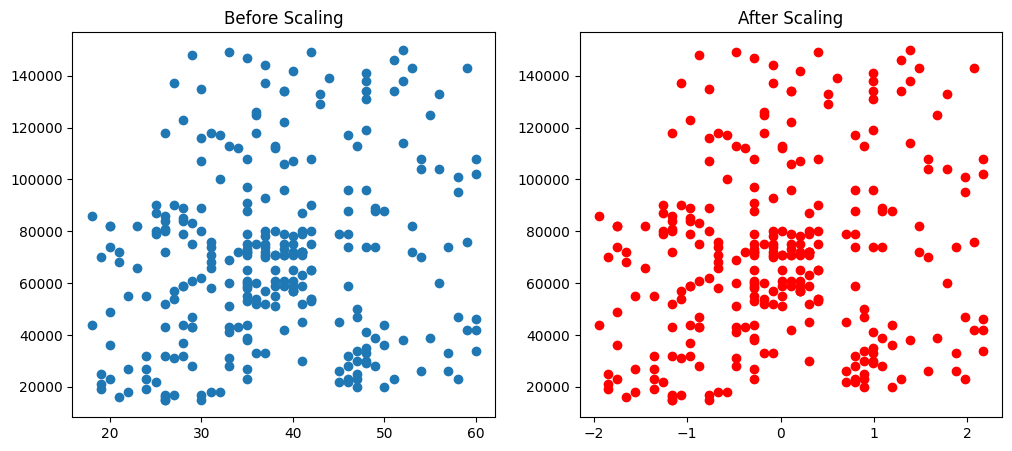

In [18]:
fig , (ax1 ,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax2.scatter(x_train_sl['Age'],x_train['EstimatedSalary'],color='red')
ax1.set_title('Before Scaling')
ax2.set_title('After Scaling')
plt.show()

#Comparision of Distribution

/tmp/ipython-input-21-3198289532.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


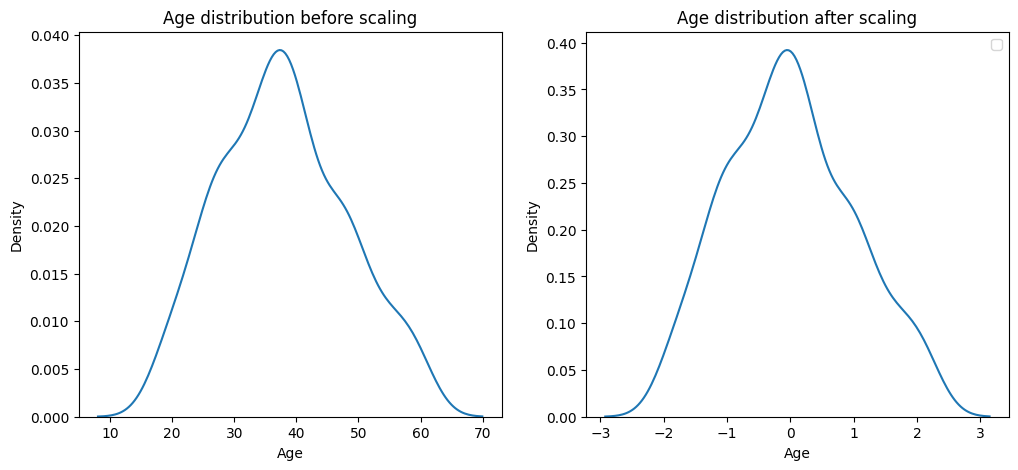

In [21]:
fig , (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title('Age distribution before scaling')
sns.kdeplot(x_train['Age'],ax=ax1)
ax2.set_title('Age distribution after scaling')
sns.kdeplot(x_train_sl['Age'],ax=ax2)
plt.legend()
plt.show()

# Why Scaling is Important

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_sl=LogisticRegression()

In [24]:
lr.fit(x_train,y_train)
lr_sl.fit(x_train_sl,y_train)

LogisticRegression()

In [25]:
y_pred = lr.predict(x_test)
y_pred_sl=lr_sl.predict(x_test_sl)

In [26]:
from sklearn.metrics import accuracy_score
print("Actual", accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_sl))

Actual 0.875
Scaled 0.8666666666666667


In [27]:
from sklearn.tree import DecisionTreeClassifier
dt =DecisionTreeClassifier()
dt_sl =DecisionTreeClassifier()

In [28]:
dt.fit(x_train,y_train)
dt_sl.fit(x_train_sl,y_train)

DecisionTreeClassifier()

In [29]:
y_pred = dt.predict(x_test)
y_pred_sl=dt.predict(x_test_sl)

In [30]:
from sklearn.metrics import accuracy_score
print("actual",accuracy_score(y_test,y_pred))
print("scaled",accuracy_score(y_test,y_pred_sl))

actual 0.875
scaled 0.6583333333333333


In [31]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# Effect on Outliers

> We will add new data to the dataframe randomly.
> Outliers where even after standardization it will remain as outlier

Conclusion : Outliers will effect the model



In [33]:
df = pd.concat([df, pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]})], ignore_index=True)

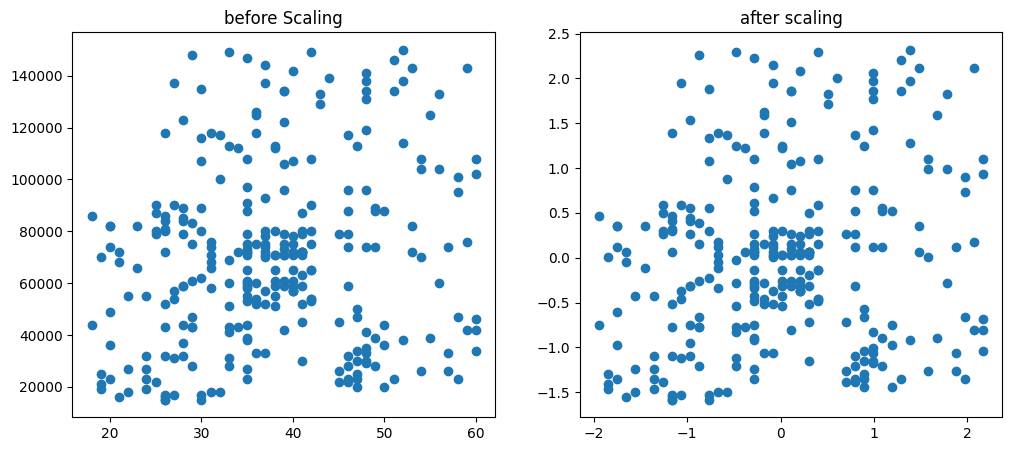

In [35]:
fig , (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax1.set_title('before Scaling')
ax2.scatter(x_train_sl['Age'],x_train_sl['EstimatedSalary'])
ax2.set_title('after scaling')
plt.show()

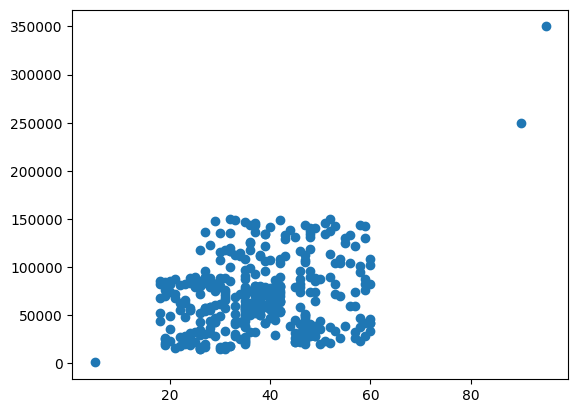

In [36]:
plt.scatter(df['Age'], df['EstimatedSalary'])